In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from matplotlib import cm

Some data visualizations are going to be working on larger datasets and so they can't be made "on the fly" based on the Flask platform. So I will make them here and store them for when they are needed.

In [ ]:
# Work with uncleaned pitch data since they contain all columns, cleaned has dropped some columns needed for this purpose
df = pd.read_csv('pitches_finalv2.csv',index_col = 0)

In [109]:
# Scope of my project can only do a list of specific players rather than any player so going to start listing off players
player = df[df['player_name'] == 'Clayton Kershaw']

fb = player[player['pitch_name'] == '4-Seam Fastball']
sl = player[player['pitch_name'] == 'Slider']
cb = player[player['pitch_name'] == 'Curveball']

pitches = player['pitch_name'].value_counts().index

X = [fb['plate_x'],sl['plate_x'], cb['plate_x']]
Y = [fb['plate_z'],sl['plate_z'], cb['plate_z']]

In [108]:
player['pitch_name'].value_counts()

4-Seam Fastball     6780
Slider              4975
Curveball           2413
2-Seam Fastball      185
Changeup              68
Intentional Ball       5
Name: pitch_name, dtype: int64

In [ ]:
def pitch_plot(x, y, bins=(512, 384)):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=12)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

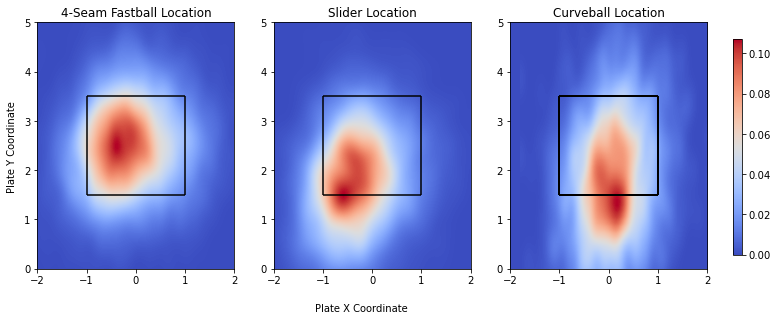

In [117]:
# Scope of my project can only do a list of specific players rather than any player so going to start listing off players
player = df[df['player_name'] == 'Clayton Kershaw']

fb = player[player['pitch_name'] == '4-Seam Fastball']
sl = player[player['pitch_name'] == 'Slider']
cb = player[player['pitch_name'] == 'Curveball']

pitches = player['pitch_name'].value_counts().index

X = [fb['plate_x'],sl['plate_x'], cb['plate_x']]
Y = [fb['plate_z'],sl['plate_z'], cb['plate_z']]


fig, ax = plt.subplots(1, len(X), figsize=(12,6))
fig.text(0.5, 0.12, 'Plate X Coordinate', ha='center')
fig.text(0.09, 0.5, 'Plate Y Coordinate', va='center', rotation='vertical')
for i in range(len(X)):
        img, extent = pitch_plot(X[i], Y[i])
        im = ax[i].imshow(img, extent=extent, origin='lower', cmap = 'coolwarm')
        ax[i].set_xlim(-2, 2)
        ax[i].set_ylim(0, 5)
        ax[i].set_facecolor('#3b4cc0')
        # Draw Strikzone
        ax[i].hlines(1.5,-1, 1, color= 'black')
        ax[i].hlines(3.5,-1, 1, color= 'black')
        ax[i].vlines(-1, 1.5, 3.5, color= 'black')
        ax[i].vlines(1, 1.5, 3.5, color= 'black')
        ax[i].set_title(f'{pitches[i]} Location')
               
cbar_ax = fig.add_axes([0.93, 0.25, 0.01, 0.5])
fig.colorbar(im, cax=cbar_ax)   
plt.savefig('C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/plots/kershaw_pitches.png')

***

Repeat for next pitcher

In [164]:
# Scope of my project can only do a list of specific players rather than any player so going to start listing off players
player = df[df['player_name'] == 'Justin Verlander']
player['pitch_name'].value_counts()

4-Seam Fastball     9935
Slider              3821
Curveball           2717
Changeup             881
Cutter                51
2-Seam Fastball       12
Intentional Ball       6
Pitch Out              2
Name: pitch_name, dtype: int64

In [165]:
pitches = player['pitch_name'].value_counts().index

# Do major pitches only
fb = player[player['pitch_name'] == '4-Seam Fastball']
sl = player[player['pitch_name'] == 'Slider']
cb = player[player['pitch_name'] == 'Curveball']
ch = player[player['pitch_name'] == 'Changeup']

In [166]:
X = [fb['plate_x'],sl['plate_x'],cb['plate_x'],ch['plate_x']]
Y = [fb['plate_z'],sl['plate_z'],cb['plate_z'],ch['plate_z']]

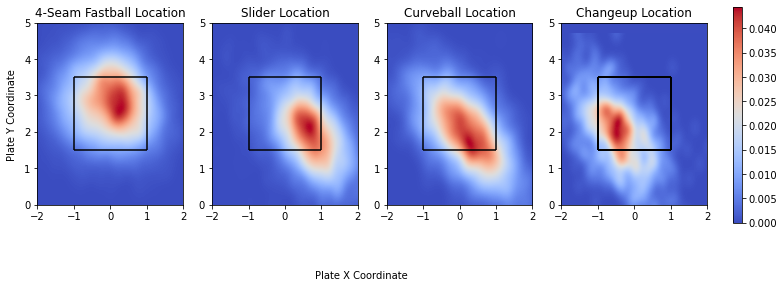

In [167]:
fig, ax = plt.subplots(1, len(X), figsize=(12,6))
fig.text(0.5, 0.12, 'Plate X Coordinate', ha='center')
fig.text(0.09, 0.5, 'Plate Y Coordinate', va='center', rotation='vertical')
for i in range(len(X)):
        img, extent = pitch_plot(X[i], Y[i])
        im = ax[i].imshow(img, extent=extent, origin='lower', cmap = 'coolwarm')
        ax[i].set_xlim(-2, 2)
        ax[i].set_ylim(0, 5)
        ax[i].set_facecolor('#3b4cc0')
        # Draw Strikzone
        ax[i].hlines(1.5,-1, 1, color= 'black')
        ax[i].hlines(3.5,-1, 1, color= 'black')
        ax[i].vlines(-1, 1.5, 3.5, color= 'black')
        ax[i].vlines(1, 1.5, 3.5, color= 'black')
        ax[i].set_title(f'{pitches[i]} Location')
               
cbar_ax = fig.add_axes([0.93, 0.25, 0.01, 0.5])
fig.colorbar(im, cax=cbar_ax)   
plt.savefig('C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/plots/verlander_pitches.png')

***

In [139]:
# Scope of my project can only do a list of specific players rather than any player so going to start listing off players
player = df[df['player_name'] == 'Max Scherzer']
player['pitch_name'].value_counts()

4-Seam Fastball    8873
Slider             3355
Changeup           2389
Curveball          1403
Cutter              948
2-Seam Fastball      89
Name: pitch_name, dtype: int64

In [140]:
pitches = player['pitch_name'].value_counts().index

# Do major pitches only
fb = player[player['pitch_name'] == '4-Seam Fastball']
sl = player[player['pitch_name'] == 'Slider']
cb = player[player['pitch_name'] == 'Curveball']
ch = player[player['pitch_name'] == 'Changeup']

In [141]:
# Adjust according to order for their pitch value counts
X = [fb['plate_x'],sl['plate_x'],ch['plate_x'],cb['plate_x']]
Y = [fb['plate_z'],sl['plate_z'],ch['plate_z'],cb['plate_z']]

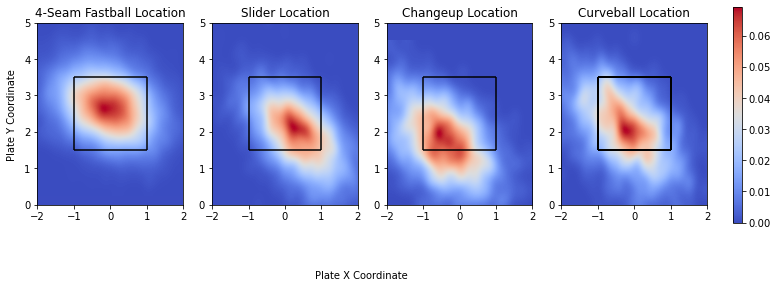

In [142]:
fig, ax = plt.subplots(1, len(X), figsize=(12,6))
fig.text(0.5, 0.12, 'Plate X Coordinate', ha='center')
fig.text(0.09, 0.5, 'Plate Y Coordinate', va='center', rotation='vertical')
for i in range(len(X)):
        img, extent = pitch_plot(X[i], Y[i])
        im = ax[i].imshow(img, extent=extent, origin='lower', cmap = 'coolwarm')
        ax[i].set_xlim(-2, 2)
        ax[i].set_ylim(0, 5)
        ax[i].set_facecolor('#3b4cc0')
        # Draw Strikzone
        ax[i].hlines(1.5,-1, 1, color= 'black')
        ax[i].hlines(3.5,-1, 1, color= 'black')
        ax[i].vlines(-1, 1.5, 3.5, color= 'black')
        ax[i].vlines(1, 1.5, 3.5, color= 'black')
        ax[i].set_title(f'{pitches[i]} Location')
               
cbar_ax = fig.add_axes([0.93, 0.25, 0.01, 0.5])
fig.colorbar(im, cax=cbar_ax)   
plt.savefig('C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/plots/scherzer_pitches.png')

***

In [151]:
# Scope of my project can only do a list of specific players rather than any player so going to start listing off players
player = df[df['player_name'] == 'Stephen Strasburg']
player['pitch_name'].value_counts()

4-Seam Fastball     5599
Curveball           3014
Changeup            2351
2-Seam Fastball     1607
Slider               779
Intentional Ball       4
Name: pitch_name, dtype: int64

In [152]:
pitches = player['pitch_name'].value_counts().index

# Do major pitches only
fb = player[player['pitch_name'] == '4-Seam Fastball']
fb2 = player[player['pitch_name'] == '2-Seam Fastball']
cb = player[player['pitch_name'] == 'Curveball']
ch = player[player['pitch_name'] == 'Changeup']

In [153]:
X = [fb['plate_x'],cb['plate_x'],ch['plate_x'],fb2['plate_x']]
Y = [fb['plate_z'],cb['plate_z'],ch['plate_z'],fb2['plate_z']]

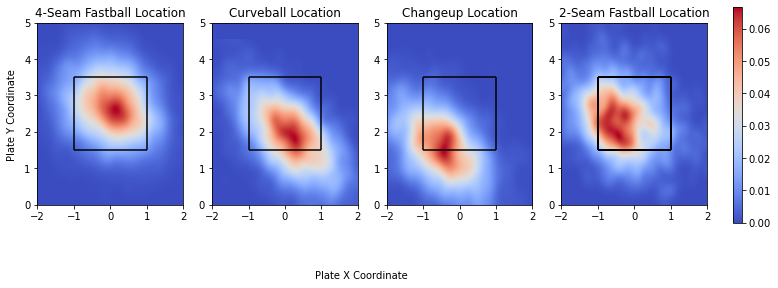

In [154]:
fig, ax = plt.subplots(1, len(X), figsize=(12,6))
fig.text(0.5, 0.12, 'Plate X Coordinate', ha='center')
fig.text(0.09, 0.5, 'Plate Y Coordinate', va='center', rotation='vertical')
for i in range(len(X)):
        img, extent = pitch_plot(X[i], Y[i])
        im = ax[i].imshow(img, extent=extent, origin='lower', cmap = 'coolwarm')
        ax[i].set_xlim(-2, 2)
        ax[i].set_ylim(0, 5)
        ax[i].set_facecolor('#3b4cc0')
        # Draw Strikzone
        ax[i].hlines(1.5,-1, 1, color= 'black')
        ax[i].hlines(3.5,-1, 1, color= 'black')
        ax[i].vlines(-1, 1.5, 3.5, color= 'black')
        ax[i].vlines(1, 1.5, 3.5, color= 'black')
        ax[i].set_title(f'{pitches[i]} Location')
               
cbar_ax = fig.add_axes([0.93, 0.25, 0.01, 0.5])
fig.colorbar(im, cax=cbar_ax)   
plt.savefig('C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/plots/strasburg_pitches.png')

***

In [155]:
# Scope of my project can only do a list of specific players rather than any player so going to start listing off players
player = df[df['player_name'] == 'Gerrit Cole']
player['pitch_name'].value_counts()

4-Seam Fastball     7979
Slider              3194
Knuckle Curve       2091
Changeup            1010
Sinker               832
2-Seam Fastball      710
Curveball             29
Intentional Ball      14
Pitch Out              4
Name: pitch_name, dtype: int64

In [156]:
pitches = player['pitch_name'].value_counts().index

# Do major pitches only
fb = player[player['pitch_name'] == '4-Seam Fastball']
sl = player[player['pitch_name'] == 'Slider']
cb = player[player['pitch_name'] == 'Knuckle Curve']
ch = player[player['pitch_name'] == 'Changeup']

In [157]:
X = [fb['plate_x'],sl['plate_x'],cb['plate_x'],ch['plate_x']]
Y = [fb['plate_z'],sl['plate_z'],cb['plate_z'],ch['plate_z']]

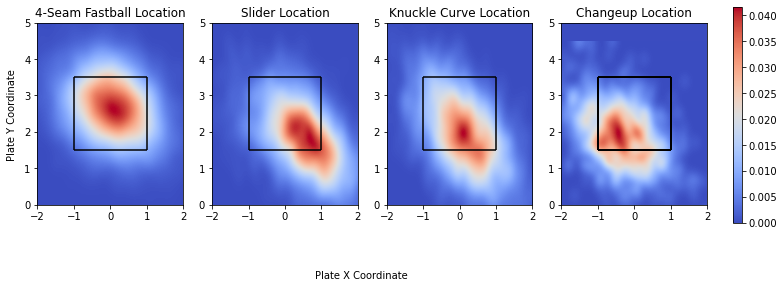

In [158]:
fig, ax = plt.subplots(1, len(X), figsize=(12,6))
fig.text(0.5, 0.12, 'Plate X Coordinate', ha='center')
fig.text(0.09, 0.5, 'Plate Y Coordinate', va='center', rotation='vertical')

for i in range(len(X)):
        img, extent = pitch_plot(X[i], Y[i])
        im = ax[i].imshow(img, extent=extent, origin='lower', cmap = 'coolwarm')
        ax[i].set_xlim(-2, 2)
        ax[i].set_ylim(0, 5)
        ax[i].set_facecolor('#3b4cc0')
        # Draw Strikzone
        ax[i].hlines(1.5,-1, 1, color= 'black')
        ax[i].hlines(3.5,-1, 1, color= 'black')
        ax[i].vlines(-1, 1.5, 3.5, color= 'black')
        ax[i].vlines(1, 1.5, 3.5, color= 'black')
        ax[i].set_title(f'{pitches[i]} Location')
               
cbar_ax = fig.add_axes([0.93, 0.25, 0.01, 0.5])
fig.colorbar(im, cax=cbar_ax)   
plt.savefig('C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/plots/cole_pitches.png')

***

In [159]:
# Scope of my project can only do a list of specific players rather than any player so going to start listing off players
player = df[df['player_name'] == 'Jacob deGrom']
player['pitch_name'].value_counts()

4-Seam Fastball     6687
Slider              3450
Changeup            2042
2-Seam Fastball     1796
Curveball           1278
Intentional Ball      12
Name: pitch_name, dtype: int64

In [160]:
pitches = player['pitch_name'].value_counts().index

# Do major pitches only
fb = player[player['pitch_name'] == '4-Seam Fastball']
sl = player[player['pitch_name'] == 'Slider']
fb2 = player[player['pitch_name'] == '2-Seam Fastball']
ch = player[player['pitch_name'] == 'Changeup']

In [161]:
X = [fb['plate_x'],sl['plate_x'],ch['plate_x'],fb2['plate_x']]
Y = [fb['plate_z'],sl['plate_z'],ch['plate_z'],fb2['plate_z']]

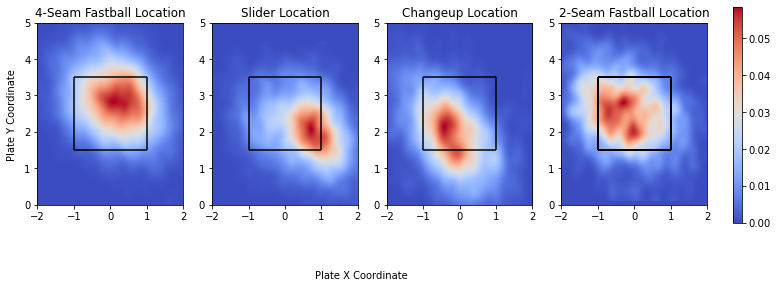

In [163]:
fig, ax = plt.subplots(1, len(X), figsize=(12,6))
fig.text(0.5, 0.12, 'Plate X Coordinate', ha='center')
fig.text(0.09, 0.5, 'Plate Y Coordinate', va='center', rotation='vertical')
for i in range(len(X)):
        img, extent = pitch_plot(X[i], Y[i])
        im = ax[i].imshow(img, extent=extent, origin='lower', cmap = 'coolwarm')
        ax[i].set_xlim(-2, 2)
        ax[i].set_ylim(0, 5)
        ax[i].set_facecolor('#3b4cc0')
        # Draw Strikzone
        ax[i].hlines(1.5,-1, 1, color= 'black')
        ax[i].hlines(3.5,-1, 1, color= 'black')
        ax[i].vlines(-1, 1.5, 3.5, color= 'black')
        ax[i].vlines(1, 1.5, 3.5, color= 'black')
        ax[i].set_title(f'{pitches[i]} Location')
               
cbar_ax = fig.add_axes([0.93, 0.25, 0.01, 0.5])
fig.colorbar(im, cax=cbar_ax)   
plt.savefig('C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/plots/degrom_pitches.png')

***

In [168]:
# Scope of my project can only do a list of specific players rather than any player so going to start listing off players
player = df[df['player_name'] == 'Zack Greinke']
player['pitch_name'].value_counts()

4-Seam Fastball     6596
Slider              3059
Changeup            3019
Curveball           1847
2-Seam Fastball     1252
Eephus               136
Intentional Ball      12
Split Finger           7
Cutter                 4
Name: pitch_name, dtype: int64

In [169]:
pitches = player['pitch_name'].value_counts().index

# Do major pitches only
fb = player[player['pitch_name'] == '4-Seam Fastball']
sl = player[player['pitch_name'] == 'Slider']
cb = player[player['pitch_name'] == 'Curveball']
ch = player[player['pitch_name'] == 'Changeup']

In [170]:
X = [fb['plate_x'],sl['plate_x'],ch['plate_x'],cb['plate_x']]
Y = [fb['plate_z'],sl['plate_z'],ch['plate_z'],cb['plate_z']]

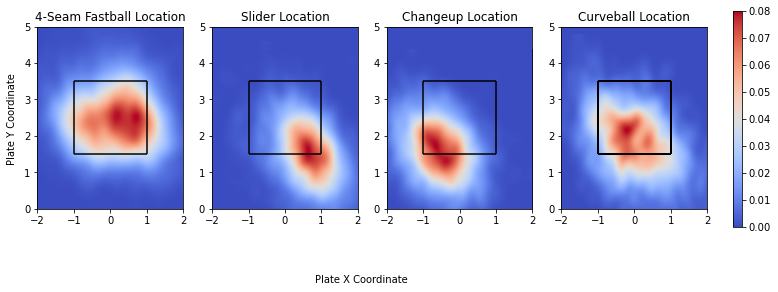

In [171]:
fig, ax = plt.subplots(1, len(X), figsize=(12,6))
fig.text(0.5, 0.12, 'Plate X Coordinate', ha='center')
fig.text(0.09, 0.5, 'Plate Y Coordinate', va='center', rotation='vertical')
for i in range(len(X)):
        img, extent = pitch_plot(X[i], Y[i])
        im = ax[i].imshow(img, extent=extent, origin='lower', cmap = 'coolwarm')
        ax[i].set_xlim(-2, 2)
        ax[i].set_ylim(0, 5)
        ax[i].set_facecolor('#3b4cc0')
        # Draw Strikzone
        ax[i].hlines(1.5,-1, 1, color= 'black')
        ax[i].hlines(3.5,-1, 1, color= 'black')
        ax[i].vlines(-1, 1.5, 3.5, color= 'black')
        ax[i].vlines(1, 1.5, 3.5, color= 'black')
        ax[i].set_title(f'{pitches[i]} Location')
               
cbar_ax = fig.add_axes([0.93, 0.25, 0.01, 0.5])
fig.colorbar(im, cax=cbar_ax)   
plt.savefig('C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/plots/greinke_pitches.png')

***

In [172]:
# Scope of my project can only do a list of specific players rather than any player so going to start listing off players
player = df[df['player_name'] == 'Madison Bumgarner']
player['pitch_name'].value_counts()

4-Seam Fastball     5485
Curveball           2445
Cutter              2394
Slider              2096
2-Seam Fastball      752
Changeup             625
Intentional Ball      12
Name: pitch_name, dtype: int64

In [173]:
pitches = player['pitch_name'].value_counts().index

# Do major pitches only
fb = player[player['pitch_name'] == '4-Seam Fastball']
sl = player[player['pitch_name'] == 'Slider']
cb = player[player['pitch_name'] == 'Curveball']
cu = player[player['pitch_name'] == 'Cutter']

In [174]:
X = [fb['plate_x'],cb['plate_x'],cu['plate_x'],sl['plate_x']]
Y = [fb['plate_z'],cb['plate_z'],cu['plate_z'],sl['plate_z']]

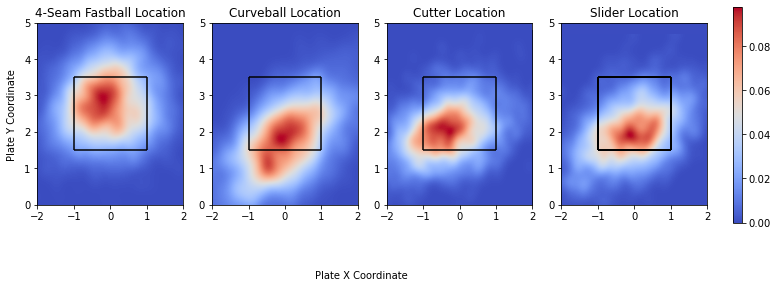

In [175]:
fig, ax = plt.subplots(1, len(X), figsize=(12,6))
fig.text(0.5, 0.12, 'Plate X Coordinate', ha='center')
fig.text(0.09, 0.5, 'Plate Y Coordinate', va='center', rotation='vertical')
for i in range(len(X)):
        img, extent = pitch_plot(X[i], Y[i])
        im = ax[i].imshow(img, extent=extent, origin='lower', cmap = 'coolwarm')
        ax[i].set_xlim(-2, 2)
        ax[i].set_ylim(0, 5)
        ax[i].set_facecolor('#3b4cc0')
        # Draw Strikzone
        ax[i].hlines(1.5,-1, 1, color= 'black')
        ax[i].hlines(3.5,-1, 1, color= 'black')
        ax[i].vlines(-1, 1.5, 3.5, color= 'black')
        ax[i].vlines(1, 1.5, 3.5, color= 'black')
        ax[i].set_title(f'{pitches[i]} Location')
               
cbar_ax = fig.add_axes([0.93, 0.25, 0.01, 0.5])
fig.colorbar(im, cax=cbar_ax)   
plt.savefig('C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/plots/bumgarner_pitches.png')

***

In [176]:
# Scope of my project can only do a list of specific players rather than any player so going to start listing off players
player = df[df['player_name'] == 'Marcus Stroman']
player['pitch_name'].value_counts()

2-Seam Fastball    5143
Slider             2797
Cutter             1766
4-Seam Fastball    1030
Changeup            656
Curveball           400
Pitch Out             1
Name: pitch_name, dtype: int64

In [177]:
pitches = player['pitch_name'].value_counts().index

# Do major pitches only
fb = player[player['pitch_name'] == '4-Seam Fastball']
sl = player[player['pitch_name'] == 'Slider']
fb2 = player[player['pitch_name'] == '2-Seam Fastball']
cu = player[player['pitch_name'] == 'Cutter']

In [178]:
X = [fb2['plate_x'],sl['plate_x'],cu['plate_x'],fb['plate_x']]
Y = [fb2['plate_z'],sl['plate_z'],cu['plate_z'],fb['plate_z']]

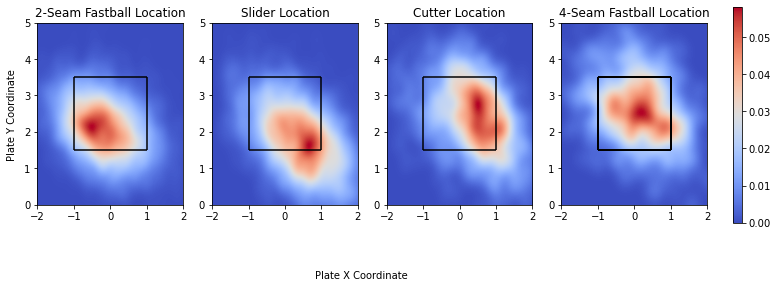

In [179]:
fig, ax = plt.subplots(1, len(X), figsize=(12,6))
fig.text(0.5, 0.12, 'Plate X Coordinate', ha='center')
fig.text(0.09, 0.5, 'Plate Y Coordinate', va='center', rotation='vertical')
for i in range(len(X)):
        img, extent = pitch_plot(X[i], Y[i])
        im = ax[i].imshow(img, extent=extent, origin='lower', cmap = 'coolwarm')
        ax[i].set_xlim(-2, 2)
        ax[i].set_ylim(0, 5)
        ax[i].set_facecolor('#3b4cc0')
        # Draw Strikzone
        ax[i].hlines(1.5,-1, 1, color= 'black')
        ax[i].hlines(3.5,-1, 1, color= 'black')
        ax[i].vlines(-1, 1.5, 3.5, color= 'black')
        ax[i].vlines(1, 1.5, 3.5, color= 'black')
        ax[i].set_title(f'{pitches[i]} Location')
               
cbar_ax = fig.add_axes([0.93, 0.25, 0.01, 0.5])
fig.colorbar(im, cax=cbar_ax)   
plt.savefig('C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/plots/stroman_pitches.png')

***

In [180]:
# Scope of my project can only do a list of specific players rather than any player so going to start listing off players
player = df[df['player_name'] == 'Chris Sale']
player['pitch_name'].value_counts()

Slider             4590
2-Seam Fastball    4458
4-Seam Fastball    3316
Changeup           3070
Fastball              2
Split Finger          1
Name: pitch_name, dtype: int64

In [126]:
pitches = player['pitch_name'].value_counts().index

# Do major pitches only
fb = player[player['pitch_name'] == '4-Seam Fastball']
sl = player[player['pitch_name'] == 'Slider']
fb2 = player[player['pitch_name'] == '2-Seam Fastball']
ch = player[player['pitch_name'] == 'Changeup']

In [181]:
X = [sl['plate_x'],fb2['plate_x'],fb['plate_x'],ch['plate_x']]
Y = [sl['plate_z'],fb2['plate_z'],fb['plate_z'],ch['plate_z']]

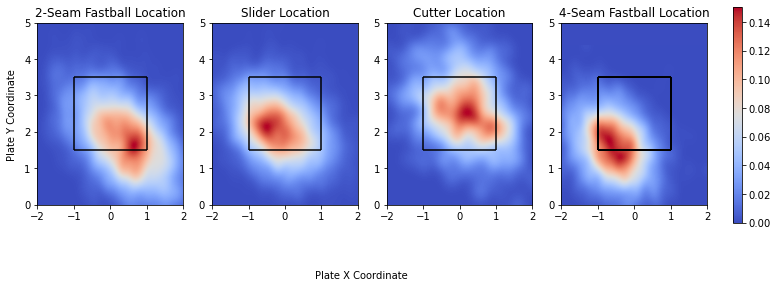

In [182]:
fig, ax = plt.subplots(1, len(X), figsize=(12,6))
fig.text(0.5, 0.12, 'Plate X Coordinate', ha='center')
fig.text(0.09, 0.5, 'Plate Y Coordinate', va='center', rotation='vertical')
for i in range(len(X)):
        img, extent = pitch_plot(X[i], Y[i])
        im = ax[i].imshow(img, extent=extent, origin='lower', cmap = 'coolwarm')
        ax[i].set_xlim(-2, 2)
        ax[i].set_ylim(0, 5)
        ax[i].set_facecolor('#3b4cc0')
        # Draw Strikzone
        ax[i].hlines(1.5,-1, 1, color= 'black')
        ax[i].hlines(3.5,-1, 1, color= 'black')
        ax[i].vlines(-1, 1.5, 3.5, color= 'black')
        ax[i].vlines(1, 1.5, 3.5, color= 'black')
        ax[i].set_title(f'{pitches[i]} Location')
               
cbar_ax = fig.add_axes([0.93, 0.25, 0.01, 0.5])
fig.colorbar(im, cax=cbar_ax)   
plt.savefig('C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/plots/sale_pitches.png')

***

In [183]:
# Scope of my project can only do a list of specific players rather than any player so going to start listing off players
player = df[df['player_name'] == 'Hyun-Jin Ryu']
player['pitch_name'].value_counts()

4-Seam Fastball     2035
Changeup            1599
Cutter              1282
Curveball            964
2-Seam Fastball      514
Slider               118
Intentional Ball       4
Eephus                 1
Name: pitch_name, dtype: int64

In [184]:
pitches = player['pitch_name'].value_counts().index

# Do major pitches only
fb = player[player['pitch_name'] == '4-Seam Fastball']
cu = player[player['pitch_name'] == 'Cutter']
cb = player[player['pitch_name'] == 'Curveball']
ch = player[player['pitch_name'] == 'Changeup']

In [185]:
X = [fb['plate_x'],ch['plate_x'],cu['plate_x'],cb['plate_x']]
Y = [fb['plate_z'],ch['plate_z'],cu['plate_z'],cb['plate_z']]

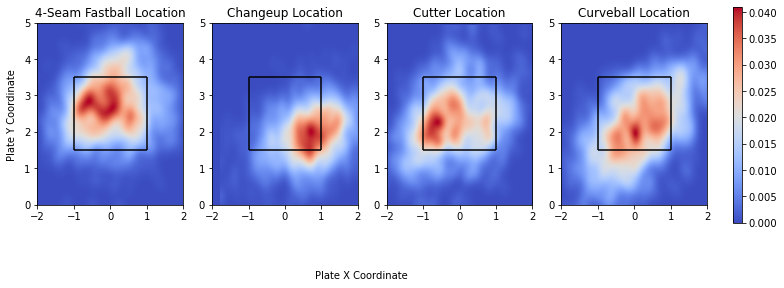

In [187]:
fig, ax = plt.subplots(1, len(X), figsize=(12,6))
fig.text(0.5, 0.12, 'Plate X Coordinate', ha='center')
fig.text(0.09, 0.5, 'Plate Y Coordinate', va='center', rotation='vertical')
for i in range(len(X)):
        img, extent = pitch_plot(X[i], Y[i])
        im = ax[i].imshow(img, extent=extent, origin='lower', cmap = 'coolwarm')
        ax[i].set_xlim(-2, 2)
        ax[i].set_ylim(0, 5)
        ax[i].set_facecolor('#3b4cc0')
        # Draw Strikzone
        ax[i].hlines(1.5,-1, 1, color= 'black')
        ax[i].hlines(3.5,-1, 1, color= 'black')
        ax[i].vlines(-1, 1.5, 3.5, color= 'black')
        ax[i].vlines(1, 1.5, 3.5, color= 'black')
        ax[i].set_title(f'{pitches[i]} Location')
               
cbar_ax = fig.add_axes([0.93, 0.25, 0.01, 0.5])
fig.colorbar(im, cax=cbar_ax)   
plt.savefig('C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/plots/ryu_pitches.png')